<a href="https://colab.research.google.com/github/acastellanos-ie/machine_learning_2/blob/master/data_cleaning_practice/practice_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [1]:
repository_url = 'https://github.com/acastellanos-ie/machine_learning_2'

In [2]:
! git clone $repository_url

Cloning into 'machine_learning_2'...
fatal: could not read Username for 'https://github.com': No such device or address


Install the requirements

In [ ]:
! pip install -Uqqr machine_learning_2/requirements.txt

Go to the practice directory



In [ ]:
%cd machine_learning_2/data_cleaning_practice

Ensure that you have the GPU runtime activated:

![](https://miro.medium.com/max/3006/1*vOkqNhJNl1204kOhqq59zA.png)

Now you have everything you need to execute the code in Colab

In [17]:
import matplotlib.pyplot as plt

# Scaling

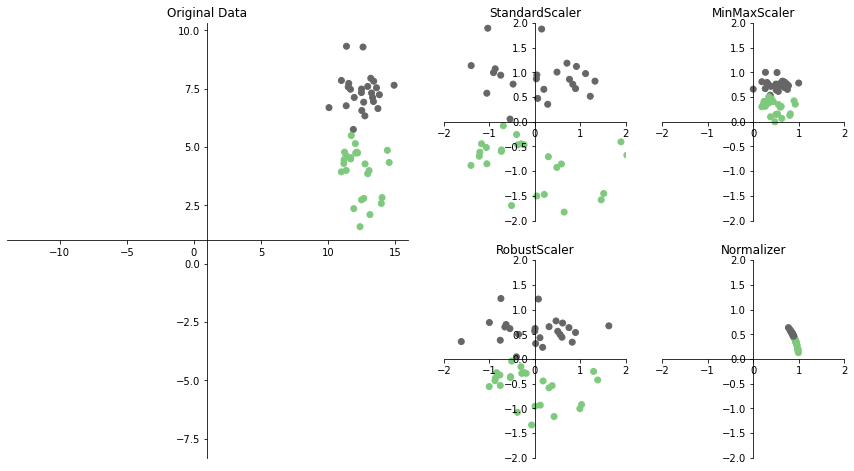

In [55]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

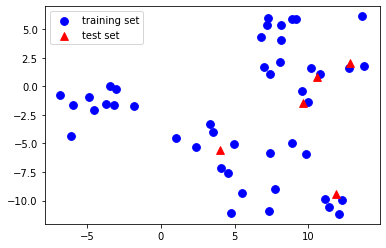

In [82]:
# Generate the dataset
X, y = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5, test_size=.1)

# plot the training and test set
plt.scatter(X_train[:, 0], X_train[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', c='r', label="test set", s=60)
plt.legend(loc='upper left');


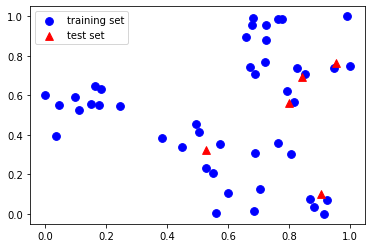

In [83]:
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c='r', label="test set", s=60);
plt.legend(loc='upper left');

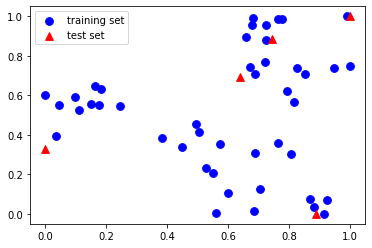

In [84]:
# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c='r', label="test set", s=60)
plt.legend(loc='upper left');

In [85]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.8